<a href="https://colab.research.google.com/github/rodrigoclira/mineracao-dados/blob/main/ativ_regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bike Sharing Dataset Data Set

# Introdução

Forneceremos um tutorial passo a passo do “Data Science Pipeline” que pode ser usado como guia para projetos de ciência de dados. Vamos considerar as seguintes fases:

* Coleta/curadoria de dados
* Gestão de Dados/Representação
* Análise exploratória de dados
* Teste de hipóteses e aprendizado de máquina
* Comunicação de insights atendidos

Para este projeto, consideraremos um problema de aprendizado de máquina supervisionado e, mais particularmente, um modelo de regressão.

Os modelos de Regressão envolvem os seguintes componentes:

* As variáveis independentes, que são observadas nos dados e são frequentemente denotadas como um vetor X

* A variável dependente, que é observada em dados e muitas vezes denotada usando o escalar Y 

* Os termos de erro, que não são observados diretamente nos dados e são frequentemente denotados usando o escalar *e*

Este tutorial é baseado na linguagem de programação Python e trabalharemos com diferentes bibliotecas como pandas, numpy, matplotlib, scikit-learn e assim por diante. Por fim, neste tutorial, fornecemos referências e recursos na forma de hiperlinks.

# Coleta de Dados

O [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.html) é um repositório de aprendizado de máquina que mantém 585 conjuntos de dados como um serviço para a comunidade de aprendizado de máquina. Você pode visualizar todos os conjuntos de dados por meio de nossa interface pesquisável. Para uma visão geral do Repositório, visite nossa página Sobre. Para obter informações sobre como citar conjuntos de dados em publicação. Para nosso projeto, optamos por trabalhar com o [Bike Sharing Dataset Data Set](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

## Bike Sharing Dataset

Este conjunto de dados contém a contagem horária de bicicletas alugadas entre 2011 e 2012 no [sistema de bicicletas compartilhadas da Washiton DC](https://ride.capitalbikeshare.com/) com as informações meteorológicas e sazonais correspondentes. Nosso objetivo é construir um modelo de Machine Learning que seja capaz de prever a contagem de bicicletas alugadas.

## Conhecimento dos Dados

Os campos do nosso conjunto de dados são os seguintes:

- **instant**: índice da instância
- **dteday**: data
- **season**: estação do ano (1:primavera, 2:verão, 3:outono, 4:inverno)
- **yr**: ano (0: 2011, 1:2012)
- **mnth** mês ( 1 a 12)
- **hr**: hora (0 a 23)
- **holiday**: se é feriado ou não (extraído do http://dchr.dc.gov/page/holiday-schedule)
- **weekday**: dia da semana
- **workingday**: se o dia não é feriado ou final de semana é 1, caso contrário é 0.
- **weathersit**: 
    - 1: Limpo, Poucas nuvens, Parcialmente nublado
    - 2: Neblina + Nublado, Neblina + Nuvens Cumulus, Neblina + Pouca Nuvens, Neblina
    - 3: Pouca meve, Pouca chuva + Trovoada + Nuvens Dispersas, Pouca Chuva + Nuvens Dispersas
    - 4: Chuva Forte + Grãos de Gelo + Trovoada + Neblina, Neve + Névoa
- **temp**: Temperatura normalizada em Celsius. Os valores são divididos por 41 (max)
- **atemp**: Sensação de temperatura normalizada em Celsius. Os valores são divididos por 50 (max)
- **hum**: Umidade normalizada. Os valores são divididos por 100 (max)
- **windspeed**: Velocidade do vento normalizada. Os valores são divididos por 67 (max)
- **casual**: contagem de usuários casuais
- **registered**: contagem de usuários registrados
- **cnt**: contagem do total de bicicletas alugadas, incluindo bicicletas casuais e registradas


Vamos começar a análise carregando os dados.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

dataset: https://raw.githubusercontent.com/rodrigoclira/mineracao-dados/main/datasets/hour.csv

In [ ]:
# Crie um dataframe na variável df usando a base do projeto
df = 

# obter as primeiras linhas
df.head()

# Pré-Processamento

## Vazamento de recursos

Se observarmos cuidadosamente nossos dados, veremos que a adição das colunas “casual” e “registered” resulta na coluna cnt. Isso é o que chamamos de vazamento e, por esse motivo, vamos removê-los do nosso conjunto de dados. 

A razão para isso é que quando queremos prever o total de aluguel de bicicletas "cnt", não teremos como informar a quantidade “casual” e a “registered”. 

In [ ]:
# Remova as colunas 'casual' e 'registered' do Dataframe

In [ ]:
# Também removeremos o `instant` do nosso modelo já que não é uma variável explicativa..
# Remova a coluna instant

Transforme as colunas no tipo de dados correto.
Vamos alterar o Tipo de Dados das seguintes colunas:

* **dteday**: Converter para Date
* **season**: Converter para Categorical
* **weekday**: Converter para Categorical
* **mnth**: Converter para Categorical

In [ ]:
# Vamos converter para datetime usando pd.to_datetime
# Vamos converter para category astype

df['dteday'] = 
df['season'] = 
df['weekday'] = 
df['mnth'] = 
 
# check the data types
df.dtypes

O resultado deve ser algo como: 
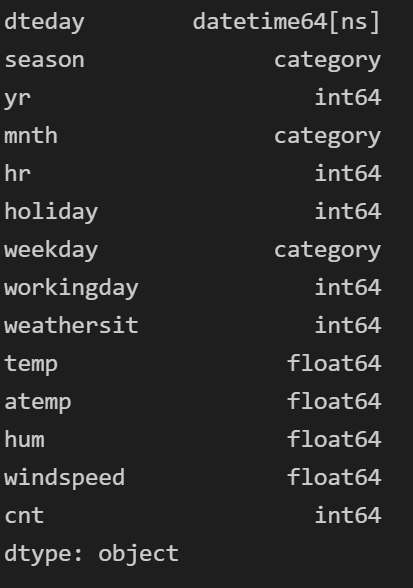

# Checando os valores ausentes

Neste ponto, verificaremos quaisquer valores ausentes em nossos dados.


In [ ]:
#Verificar se há dados ausentes

Como podemos ver, não há valor ausente em nenhum campo.

# Checando valores duplicados

Neste ponto, verificaremos se há valores duplicados, onde como podemos ver abaixo, não há valores duplicados. Então, estamos ok para prosseguir.

In [ ]:
#Verificar se há dados duplicados

# Descrição do Dataset

Vamos ver um resumo de nossos campos de dados para as variáveis contínuas mostrando a média, std, min, max e Q2, Q3.

In [ ]:
df.describe()

Por fim, vamos obter o número de linhas e colunas do nosso conjunto de dados até agora.

In [ ]:
# Visualizar as dimensões do dataset

# Análise Exploratória (Exploratory Data Analysis - EDA)

Neste ponto, executamos uma análise exploratória. Vamos dar uma olhada no Aluguel de Bicicletas ao longo do tempo.

Gráfico de Séries Temporais de Bicicletas de Aluguel por Hora

In [ ]:
df.plot(x='dteday', y='cnt', figsize=(20,12), title = 'Alugel de bicicletas por data')
plt.ylabel('cnt')

Distribuição das Bicicletas de Aluguel

In [ ]:
df['cnt'].plot.hist(bins=20, figsize=(12,8))

In [ ]:
df.boxplot(by='yr', column='cnt', figsize=(12,8))
plt.title("Aluguel de bicicletas por Ano")

In [ ]:
df.boxplot(by='mnth', column='cnt', figsize=(12,8))
plt.title("Aluguel de bicicletas por Mês")

In [ ]:
df.boxplot(by=['hr'], column='cnt', figsize=(12,8))
plt.title("Aluguel de bicicletas por Hora")

In [ ]:
df.boxplot(by=['weekday'], column='cnt', figsize=(12,8))
plt.title("Aluguel de bicicletas por Dia da Semana")

In [ ]:
df.boxplot(by='season', column='cnt', figsize=(12,8))
plt.title("Aluguel de bicicletas por Estações")

In [ ]:
df.boxplot(by=['season','yr'], column='cnt', figsize=(12,8))
plt.title("Aluguel de bicicletas por Estações e Ano")

# Mapa de calor de correlação e correlação

Retornaremos o coeficiente de correlação de Pearson das variáveis numéricas.

In [ ]:
#Gerar a correlação em formato de tabela

In [ ]:
# correlação de Aluguel de Bicicletas versus as variáveis de descanso
df.drop('cnt', axis=1).corrwith(df.cnt)

In [ ]:
#Gerar a correlação usando heatmap
plt.figure(figsize=(12,8))

# Multi colineariade

Como esperado, temp e atemp estão fortemente correlacionados causando um problema de muticolinearidade e é por isso que manteremos apenas um. Vamos remover o temp.

In [ ]:
# Remover a coluna 'temp'

# Remova também a coluna de 'data', pois não a usaremos para a modelagem de aprendizado de máquina

# Teste de hipóteses e aprendizado de máquina

Antes de começarmos a analisar nossos modelos, precisaremos aplicar a codificação one-hot às variáveis categóricas. Faremos isso aplicando a função get_dummies.

## One-Hot Encoding

In [ ]:
# Faça o one-hot encoding em toda a base
df = 

# Train-Test Dataset
Para nossa análise, dividimos o conjunto de dados em treinar e testar (75% -25%) para construir os modelos no conjunto de dados de treino e avaliá-los no conjunto de dados de teste.

In [ ]:
# Separe os atributos X e a variável alvo (y)
y = 
X = 

Agora vamos separar os dados de treino e teste. Deixando 25% dos dados para teste e usando o random_state igual a 5

In [ ]:
#Separe os dados de treino e teste (X_train, X_test, y_train, y_test)

In [ ]:
X_train

# Modelagem

Vamos experimentar diferentes modelos de aprendizado de máquina

* Regressão linear
* Random Forest

e vamos escolher aquele com o menor RMSE.

## Linear Regression

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
 
reg = LinearRegression().fit(X_train, y_train)
 
# Obtendo o RMSE para o conjunto de dados de treino
erro_treino = np.sqrt(mean_squared_error(y_train, reg.predict(X_train)))
 
# Obtendo o RMSE para o conjunto de dados de teste
erro_teste = np.sqrt(mean_squared_error(y_test, reg.predict(X_test)))

print("Regressão Linear")
print(f"O Erro RMSE de Treino foi {erro_treino}")
print(f"O Erro RMSE de Teste foi {erro_teste}")

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
 
rf = RandomForestRegressor().fit(X_train, y_train)
 
# Obtendo o RMSE para o conjunto de dados de treino
erro_treino = np.sqrt(mean_squared_error(y_train, rf.predict(X_train)))
 
# Obtendo o RMSE para o conjunto de dados de teste
erro_teste =  np.sqrt(mean_squared_error(y_test, rf.predict(X_test)))

print("Random Forest")
print(f"O Erro RMSE de Treino foi {erro_treino}")
print(f"O Erro RMSE de Teste foi {erro_teste}")

In [ ]:
rf

# Escolhendo o Melhor Modelo

Com base no RMSE no conjunto de dados de treinamento e teste, o melhor modelo é o Random Forest.

## Análise estatística

Com base na análise estatística e no Gini, definiremos as variáveis mais importantes do modelo Random Forest.


In [ ]:
feat_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances

In [ ]:
feat_importances.plot(kind='bar', figsize=(12,8))

Como podemos ver as variáveis mais importantes são:

* A hora com 60%
* A temperatura com 14%
* O ano com 8%

# Tunig + GridSearch

Agora vamos avaliar um pouco os hiperparâmetros do RandomForest (nosso melhor modelo). Iremos usar o GridSearch para testar diferentes valores do hiperparâmetro 'n_estimators'. Vamos avaliar os seguintes valores 50, 100, 200, 300

In [ ]:
from sklearn.model_selection import GridSearchCV

# Crie a grade de parâmetros com base nos resultados que vai testar os valores
# 50, 100, 200, 300 para o n_estimators
param_grid = {    
    
}

# Criar um modelo
rf = RandomForestRegressor()

# Instanciar o modelo de pesquisa de grade
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 10)


In [ ]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Exibindo os melhores hiperparâmetros

In [ ]:
grid_search.best_params_

In [ ]:
#Obtenha o melhor modelo do grid_search
best_grid = 

Definindo uma função para exibir a curva de aprendizado

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


Abaixo é usado a função definida anteriormente para criar uma curva de aprendizado

In [ ]:
plot_learning_curve(best_grid, "Curva de Aprendizado", X_train, y_train, (0.7, 1.01), cv=5, n_jobs=5)

In [ ]:
plt.show()

In [ ]:
# Obtendo o RMSE para o conjunto de dados de treino
erro_treino = np.sqrt(mean_squared_error(y_train, best_grid.predict(X_train)))
 
# Obtendo o RMSE para o conjunto de dados de teste
erro_teste =  np.sqrt(mean_squared_error(y_test, best_grid.predict(X_test)))

In [ ]:
print("Random Forest Tunado")
print(f"O Erro RMSE de Treino foi {erro_treino}")
print(f"O Erro RMSE de Teste foi {erro_teste}")

# Insights

Descobrimos que o número de Aluguéis de Bicicletas depende da hora e da temperatura. Além disso, parece que há uma interação entre as variáveis, como hora e dia da semana, ou mês e ano etc e, por esse motivo, os modelos baseados em árvore como Random Forest teve um desempenho muito melhor que a regressão linear. Além disso, os modelos baseados em árvore são capazes de capturar relações não lineares, por exemplo, as horas e a temperatura não têm uma relação linear, por exemplo, se estiver extremamente quente ou frio, o aluguel de bicicletas pode cair. Nosso modelo tem um RMSE de 42 no conjunto de dados de teste, o que parece ser promissor.

# Referências

* https://predictivehacks.com/an-example-of-a-data-science-pipeline-in-python-on-bike-sharing-dataset/

* https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

* https://docs.w3cub.com/scikit_learn/auto_examples/model_selection/plot_learning_curve